In [ ]:
pip install statsmodels matplotlib


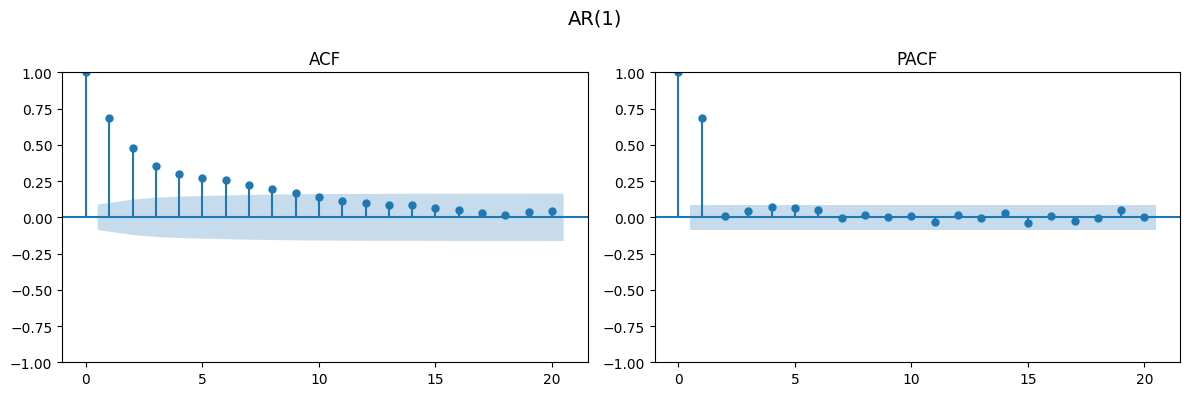

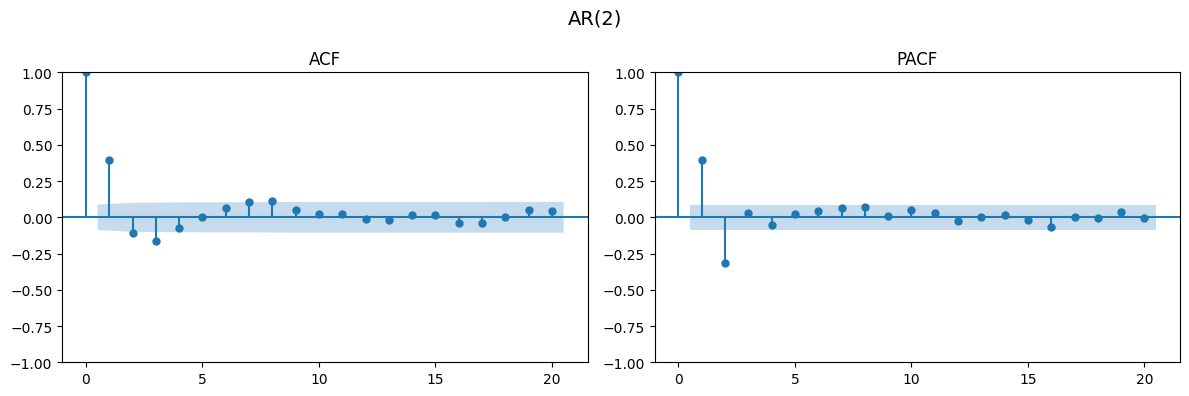

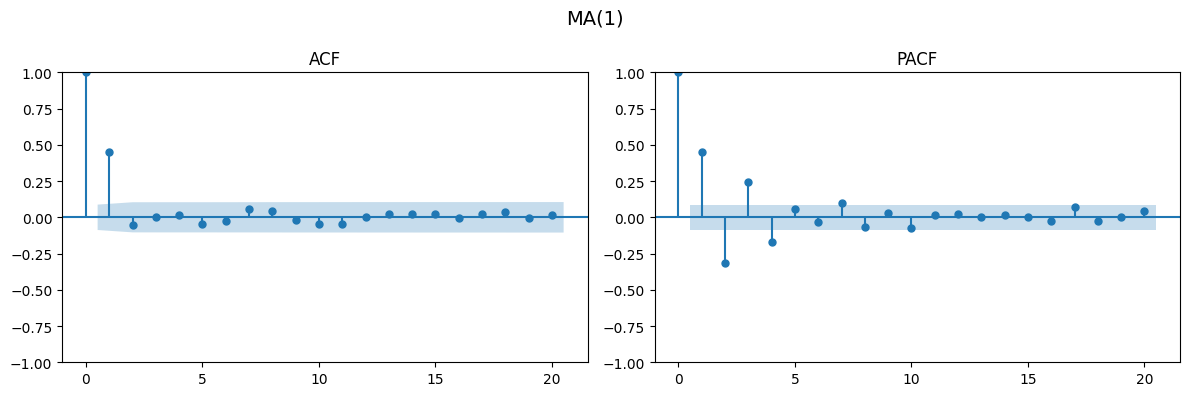

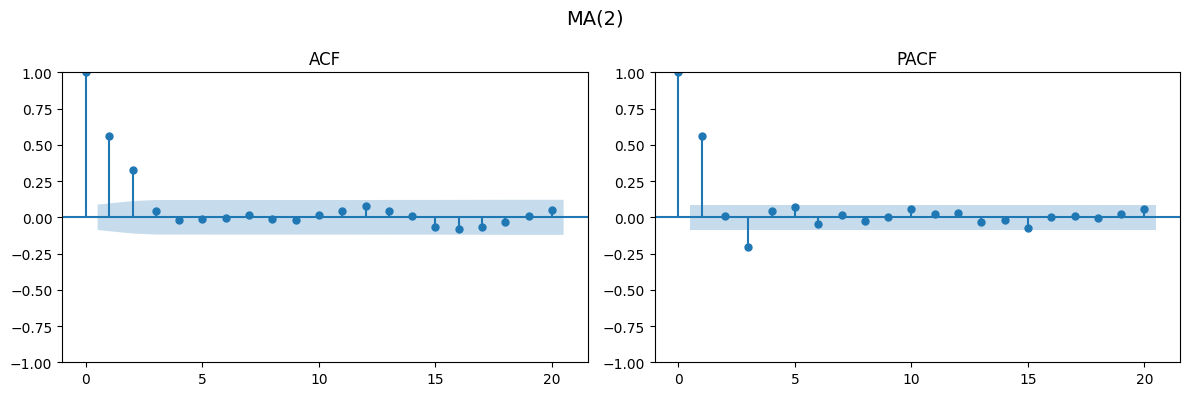

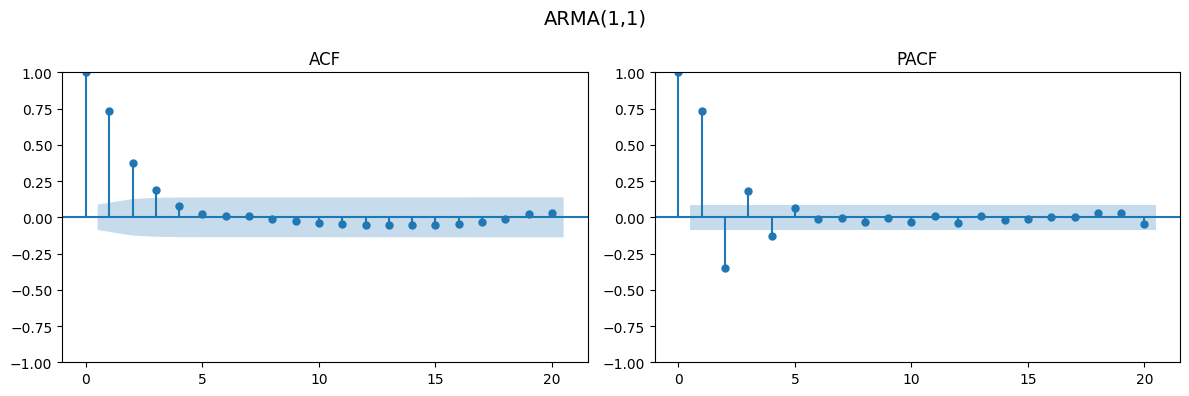

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def simulate_and_plot(ar_coeffs=[], ma_coeffs=[], model_name="Model"):
    # Add leading 1 for statsmodels' convention
    ar = np.r_[1, -np.array(ar_coeffs)]  # e.g., AR(1) with phi=0.7 → [1, -0.7]
    ma = np.r_[1, np.array(ma_coeffs)]   # e.g., MA(1) with theta=0.5 → [1, 0.5]

    # Create model and simulate data
    arma_process = ArmaProcess(ar, ma)
    simulated_data = arma_process.generate_sample(nsample=500)

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"{model_name}", fontsize=14)
    plot_acf(simulated_data, lags=20, ax=axes[0])
    axes[0].set_title("ACF")
    plot_pacf(simulated_data, lags=20, ax=axes[1], method="ywm")
    axes[1].set_title("PACF")
    plt.tight_layout()
    plt.show()

# Simulate and plot each model
simulate_and_plot(ar_coeffs=[0.7], ma_coeffs=[], model_name="AR(1)")
simulate_and_plot(ar_coeffs=[0.5, -0.3], ma_coeffs=[], model_name="AR(2)")
simulate_and_plot(ar_coeffs=[], ma_coeffs=[0.7], model_name="MA(1)")
simulate_and_plot(ar_coeffs=[], ma_coeffs=[0.5, 0.4], model_name="MA(2)")
simulate_and_plot(ar_coeffs=[0.6], ma_coeffs=[0.5], model_name="ARMA(1,1)")


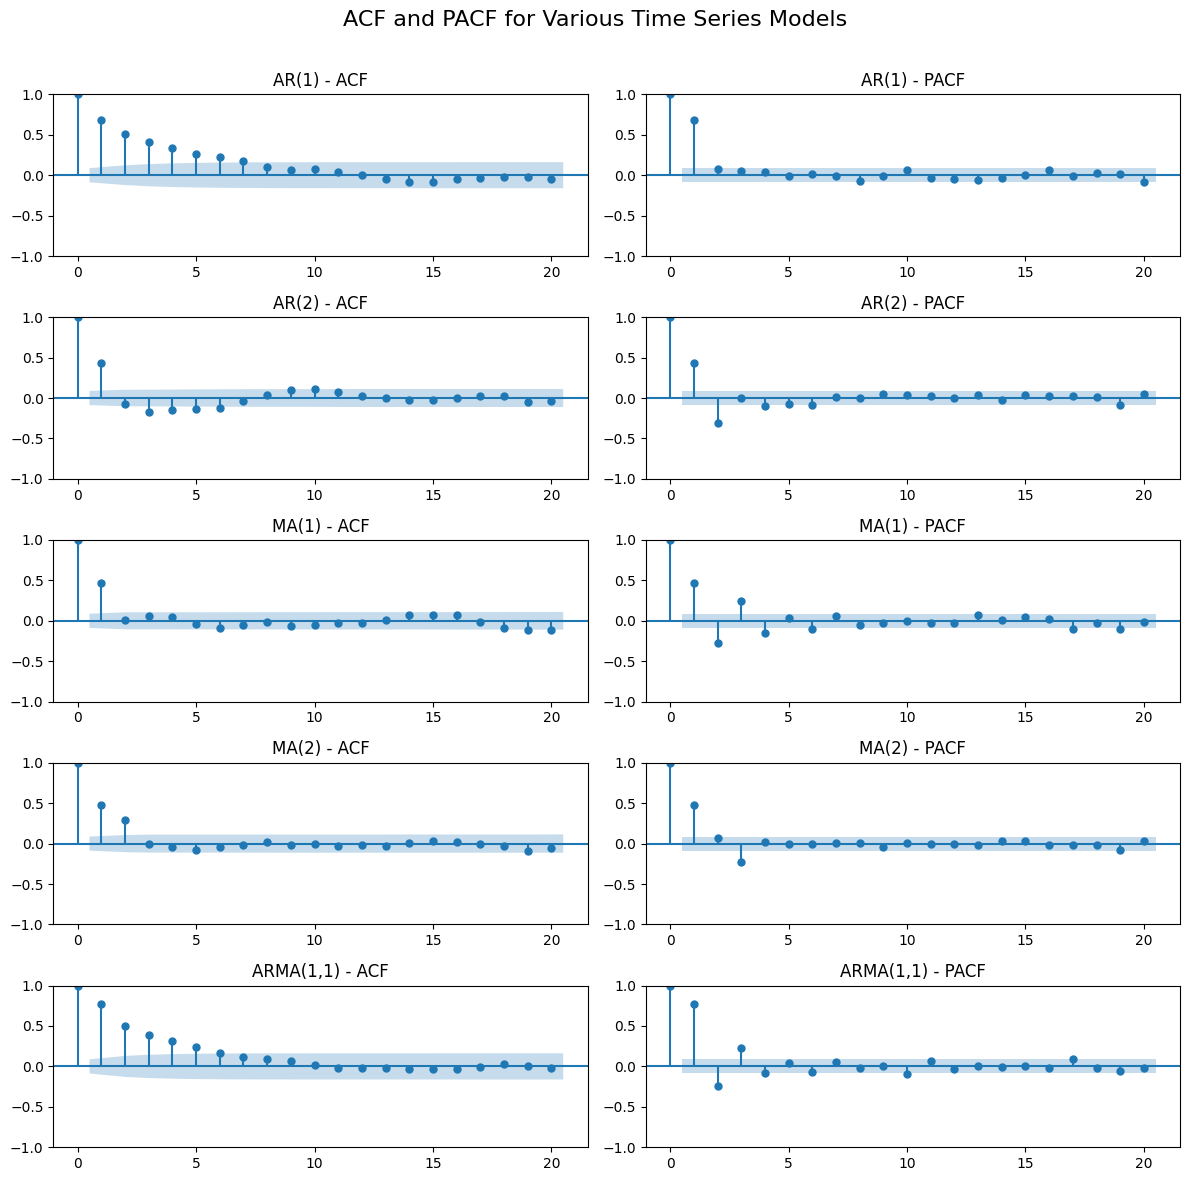

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define model configurations
models = {
    "AR(1)": {"ar": [0.7], "ma": []},
    "AR(2)": {"ar": [0.5, -0.3], "ma": []},
    "MA(1)": {"ar": [], "ma": [0.7]},
    "MA(2)": {"ar": [], "ma": [0.5, 0.4]},
    "ARMA(1,1)": {"ar": [0.6], "ma": [0.5]}
}

# Plot ACF and PACF for each model
fig, axes = plt.subplots(len(models), 2, figsize=(12, 12))
fig.suptitle("ACF and PACF for Various Time Series Models", fontsize=16)

for i, (model_name, params) in enumerate(models.items()):
    ar = np.r_[1, -np.array(params["ar"])]
    ma = np.r_[1, np.array(params["ma"])]

    arma_process = ArmaProcess(ar, ma)
    simulated_data = arma_process.generate_sample(nsample=500)

    plot_acf(simulated_data, lags=20, ax=axes[i, 0])
    axes[i, 0].set_title(f"{model_name} - ACF")
    plot_pacf(simulated_data, lags=20, ax=axes[i, 1], method="ywm")
    axes[i, 1].set_title(f"{model_name} - PACF")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


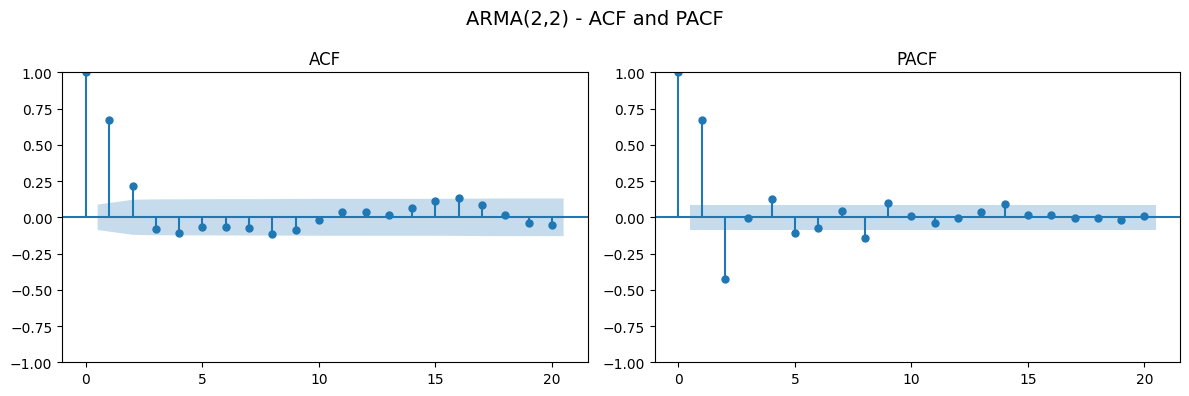

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define ARMA(2,2) model coefficients
ar_coeffs = [0.5, -0.25]  # AR(2)
ma_coeffs = [0.4, 0.3]    # MA(2)

# Add leading 1 for statsmodels convention
ar = np.r_[1, -np.array(ar_coeffs)]
ma = np.r_[1, np.array(ma_coeffs)]

# Generate ARMA(2,2) time series
arma_process = ArmaProcess(ar, ma)
simulated_data = arma_process.generate_sample(nsample=500)

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("ARMA(2,2) - ACF and PACF", fontsize=14)

plot_acf(simulated_data, lags=20, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(simulated_data, lags=20, ax=axes[1], method="ywm")
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()
